In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [8]:
from dateutil.parser import parse

In [52]:
df = pd.read_csv('ohtani+baseball+cards_output.csv')
df

,title,soldprice,link,solddate,bids
0,Shop on eBay,20.00,https://ebay.com/itm/123456?hash=item28caef0a3...,NaN,NaN
1,Shohei Ohtani 2023 Bowman Chrome Mojo Refracto...,5.00,https://www.ebay.com/itm/305113977419?hash=ite...,"Sold Sep 8, 2023",NaN
2,2018 Topps Update “Japans Finest” Shohei Ohta...,6.99,https://www.ebay.com/itm/314817529687?hash=ite...,"Sold Sep 8, 2023",NaN
3,New Listing2023 Topps Chrome Baseball Shohei O...,11.99,https://www.ebay.com/itm/314820875253?hash=ite...,"Sold Sep 8, 2023",NaN
4,"SHOHEI OHTANI 15 CARD LOT - 2022, 23 TOPPS/BOW...",4.51,https://www.ebay.com/itm/305112331411?hash=ite...,"Sold Sep 8, 2023",6 bids
...,...,...,...,...,...
300,2022 MLB Topps Now Card SHOHEI OHTANI #OS-18 A...,2.89,https://www.ebay.com/itm/355010778646?epid=260...,"Sold Sep 7, 2023",1 bid
301,2021 Panini Chronicles Shohei Ohtani Phoenix c...,1.99,https://www.ebay.com/itm/285091687604?hash=ite...,"Sold Sep 7, 2023",NaN
302,2021 Donruss #199 Shohei Ohtani base card Angels,1.49,https://www.ebay.com/itm/284950780071?hash=ite...,"Sold Sep 7, 2023",NaN
303,2022 Bowman Chrome #71 Shohei Ohtani card Angels,3.99,https://www.ebay.com/itm/285053569728?hash=ite...,"Sold Sep 7, 2023",NaN


# Clean the Data

In [53]:
df = df[df.get('title')!='Shop on eBay'].reset_index(drop = True)

In [54]:
df.head()

,title,soldprice,link,solddate,bids
0,Shohei Ohtani 2023 Bowman Chrome Mojo Refracto...,5.00,https://www.ebay.com/itm/305113977419?hash=ite...,"Sold Sep 8, 2023",NaN
1,2018 Topps Update “Japans Finest” Shohei Ohta...,6.99,https://www.ebay.com/itm/314817529687?hash=ite...,"Sold Sep 8, 2023",NaN
2,New Listing2023 Topps Chrome Baseball Shohei O...,11.99,https://www.ebay.com/itm/314820875253?hash=ite...,"Sold Sep 8, 2023",NaN
3,"SHOHEI OHTANI 15 CARD LOT - 2022, 23 TOPPS/BOW...",4.51,https://www.ebay.com/itm/305112331411?hash=ite...,"Sold Sep 8, 2023",6 bids
4,"2018 Topps Update Shohei Ohtani Next Step, Sta...",89.99,https://www.ebay.com/itm/126072723348?hash=ite...,"Sold Sep 8, 2023",NaN


## Fixing Dates

In [55]:
# turn str date time to datetime.datetime
test_date = df['solddate'].iloc[1].replace('Sold  ', '')
print(parse(test_date))
type(parse(test_date))

2023-09-08 00:00:00


datetime.datetime

In [56]:
stripped_dates = []
for i in df['solddate']:
    try:
        stripped_dates.append(i.replace('Sold  ', ''))
    except:
        stripped_dates.append(np.nan)

In [57]:
df['solddate'] = [parse(i) for i in stripped_dates]

## Clean Bids Column

In [77]:
num_bids = []
for i in df['bids']:
    try:
        np.isnan(i)
        num_bids.append(0)
    except:
        num_bids.append(int(i.split()[0]))
        continue

In [79]:
df['bids'] = num_bids

In [80]:
df.head()

,title,soldprice,link,solddate,bids
0,Shohei Ohtani 2023 Bowman Chrome Mojo Refracto...,5.00,https://www.ebay.com/itm/305113977419?hash=ite...,2023-09-08,0
1,2018 Topps Update “Japans Finest” Shohei Ohta...,6.99,https://www.ebay.com/itm/314817529687?hash=ite...,2023-09-08,0
2,New Listing2023 Topps Chrome Baseball Shohei O...,11.99,https://www.ebay.com/itm/314820875253?hash=ite...,2023-09-08,0
3,"SHOHEI OHTANI 15 CARD LOT - 2022, 23 TOPPS/BOW...",4.51,https://www.ebay.com/itm/305112331411?hash=ite...,2023-09-08,6
4,"2018 Topps Update Shohei Ohtani Next Step, Sta...",89.99,https://www.ebay.com/itm/126072723348?hash=ite...,2023-09-08,0


## Clean Sold Price Columns

In [95]:
float('5.00')

5.0

In [104]:
np.average([1.34, 2])

1.67

### For prices that are like '4.99 to 11.99', I appended the average value of the range

In [108]:
converted_prices = []
for i in df['soldprice']:
    try:
        converted_prices.append(float(i))
    except:
        sp = i.split()
        converted_prices.append((float(sp[0])+float(sp[-1]))/2)

converted_prices

[5.0,
 6.99,
 11.99,
 4.51,
 89.99,
 99.99,
 32.99,
 31.0,
 152.5,
 16.15,
 8.44,
 20.0,
 3.51,
 42.91,
 256.0,
 4.99,
 39.99,
 38.0,
 1.49,
 16.5,
 20.5,
 14.01,
 800.0,
 11.5,
 51.04,
 36.0,
 8.35,
 1.25,
 899.99,
 17.99,
 45.75,
 69.99,
 44.0,
 10.0,
 36.0,
 13.4,
 81.0,
 135.0,
 76.55,
 30.0,
 299.95,
 109.99,
 34.99,
 7.52,
 22.5,
 11.0,
 9.95,
 9.95,
 9.95,
 9.95,
 15.0,
 39.99,
 21.5,
 6.99,
 12.5,
 74.99,
 17.5,
 26.0,
 12.5,
 19.99,
 19.99,
 4.0,
 22.49,
 19.5,
 13.97,
 17.99,
 925.0,
 69.99,
 127.5,
 45.0,
 29.0,
 3.17,
 3.0,
 13.0,
 12.95,
 1.5,
 12.0,
 2.0,
 0.01,
 35.0,
 49.99,
 14.5,
 59.75,
 15.0,
 10.5,
 13.99,
 182.5,
 7.77,
 70.0,
 11.5,
 2500.0,
 4.99,
 1.99,
 2.99,
 1.84,
 2.99,
 22.0,
 75.0,
 2.25,
 20.0,
 2.99,
 49.99,
 6.99,
 2.99,
 199.99,
 19.98,
 10.0,
 1799.99,
 35.0,
 39.99,
 1.79,
 47.95,
 8.95,
 1799.99,
 5.495,
 1.59,
 12.995,
 9.99,
 2.88,
 44.99,
 6.49,
 1.99,
 975.0,
 0.99,
 25.0,
 4.24,
 6.49,
 27.98,
 10.6,
 1.1800000000000002,
 39.99,
 3.49,
 8.5,
 

In [109]:
df['soldprice'] = converted_prices

In [110]:
df.head()

,title,soldprice,link,solddate,bids
0,Shohei Ohtani 2023 Bowman Chrome Mojo Refracto...,5.00,https://www.ebay.com/itm/305113977419?hash=ite...,2023-09-08,0
1,2018 Topps Update “Japans Finest” Shohei Ohta...,6.99,https://www.ebay.com/itm/314817529687?hash=ite...,2023-09-08,0
2,New Listing2023 Topps Chrome Baseball Shohei O...,11.99,https://www.ebay.com/itm/314820875253?hash=ite...,2023-09-08,0
3,"SHOHEI OHTANI 15 CARD LOT - 2022, 23 TOPPS/BOW...",4.51,https://www.ebay.com/itm/305112331411?hash=ite...,2023-09-08,6
4,"2018 Topps Update Shohei Ohtani Next Step, Sta...",89.99,https://www.ebay.com/itm/126072723348?hash=ite...,2023-09-08,0


In [120]:
df[df.get('soldprice')==df['soldprice'].max()].get('link')

90    https://www.ebay.com/itm/115909984387?hash=ite...
Name: link, dtype: object

In [123]:
desc = df.describe()
desc

,soldprice,bids
count,300.000000,300.000000
mean,63.568317,3.573333
std,230.838365,6.989573
min,0.010000,0.000000
25%,3.682500,0.000000
50%,12.500000,0.000000
75%,39.990000,4.000000
max,2500.000000,44.000000


In [173]:
temp = df.groupby('solddate').count().index[-1]
temp2 = df.groupby('solddate').count().index[-2]

smaller_dates = df[df.get('solddate') != temp]
smaller_dates = smaller_dates[smaller_dates.get('solddate')!= temp2]

<Axes: xlabel='solddate'>

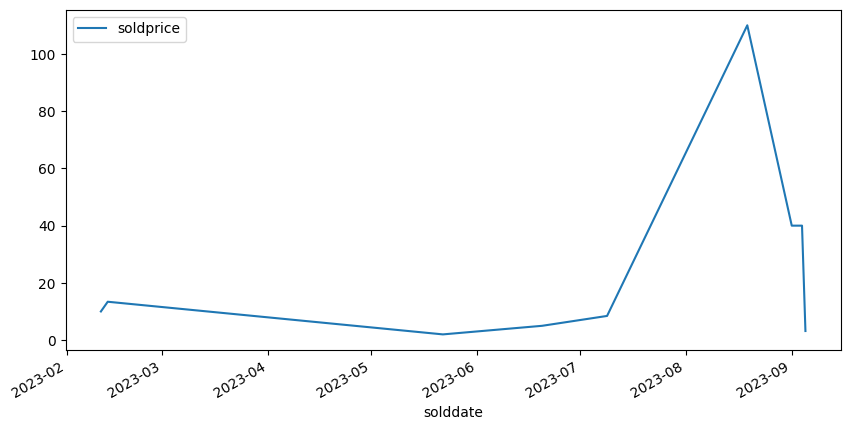

In [177]:
smaller_dates.plot(y = 'soldprice',
                   x = 'solddate',
                  figsize = (10, 5))

In [137]:
# remove min and max

s_df = df[df.get('soldprice') < 150]
s_df = s_df[s_df.get('soldprice')!=df['soldprice'].min()]

<Axes: xlabel='solddate'>

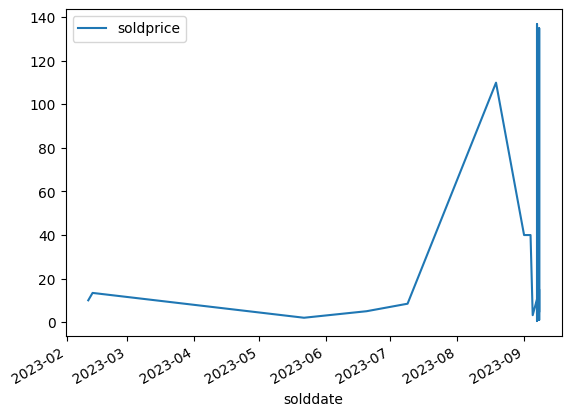

In [138]:
s_df.plot('solddate', 'soldprice')

In [151]:
dates = df.groupby('solddate').count().index
dates[-2]

Timestamp('2023-09-07 00:00:00')

In [160]:
df[df.get('solddate')== dates[-2]]

,title,soldprice,link,solddate,bids
141,2022 Bowman Chrome Base Cards Rookies/Veterans...,0.99,https://www.ebay.com/itm/325482001587?hash=ite...,2023-09-07,0
142,2023 Topps Series 2 - STARS OF MLB INSERTS - C...,2.67,https://www.ebay.com/itm/354872751770?hash=ite...,2023-09-07,0
143,2023 Topps Series 2 - 1988 TOPPS 35TH ANNIVERS...,2.95,https://www.ebay.com/itm/354872867130?hash=ite...,2023-09-07,0
144,2022 Topps HERITAGE HIGH NUMBER Baseball *Pick...,6.47,https://www.ebay.com/itm/204308890991?hash=ite...,2023-09-07,0
145,Shohei Ohtani 2022 BOWMAN Base MVP #68 Flagshi...,1.59,https://www.ebay.com/itm/134278830926?hash=ite...,2023-09-07,0
...,...,...,...,...,...
295,2022 MLB Topps Now Card SHOHEI OHTANI #OS-18 A...,2.89,https://www.ebay.com/itm/355010778646?epid=260...,2023-09-07,1
296,2021 Panini Chronicles Shohei Ohtani Phoenix c...,1.99,https://www.ebay.com/itm/285091687604?hash=ite...,2023-09-07,0
297,2021 Donruss #199 Shohei Ohtani base card Angels,1.49,https://www.ebay.com/itm/284950780071?hash=ite...,2023-09-07,0
298,2022 Bowman Chrome #71 Shohei Ohtani card Angels,3.99,https://www.ebay.com/itm/285053569728?hash=ite...,2023-09-07,0


<Axes: ylabel='Frequency'>

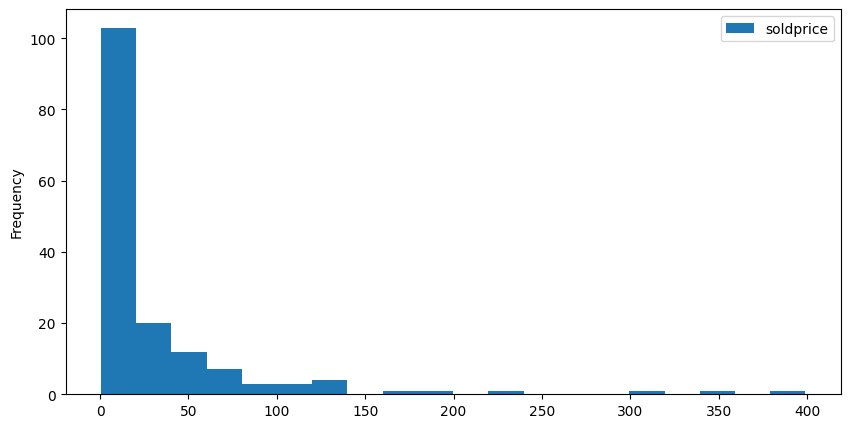

In [164]:
df[df.get('solddate')== dates[-2]].plot(y = 'soldprice', kind = 'hist',
                                        bins = 20,
                                       figsize = (10, 5))

In [118]:
df['soldprice'].min()

0.01

In [116]:
df['soldprice'].max()

2500.0

<Axes: xlabel='solddate'>

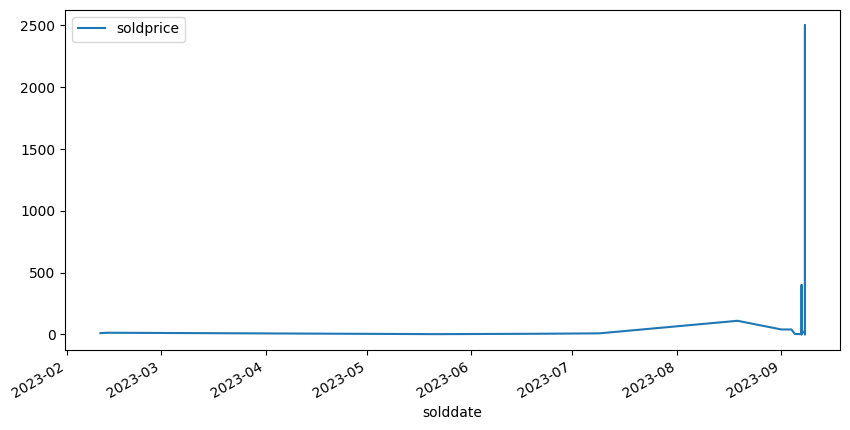

In [115]:
df.plot('solddate', 'soldprice', figsize = [10, 5])